# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [43]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
parent_working_directory = os.getcwd()
print(parent_working_directory)
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        temp_df = pd.read_parquet(file_path)

        # We will be sampling based on hours as we do not want oversampling or undersampling when records for the hour are too high or too low
        # We took a fraction of 0.008 from the sample. This would approximately reduce the sample size around 3 lakh rows
        # lamda function will iterate through each hour and take a fraction. If records are less than 100 it takes all
        temp_df["hour"] = temp_df["tpep_pickup_datetime"].dt.hour
        sampled_df = temp_df.groupby("hour", group_keys=False).apply(lambda x: x.sample(frac=0.008, random_state=42) if len(x) > 100 else x)
        df = pd.concat([df, sampled_df], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Changing the directory back to the default(where the jupyter file is kept)
os.chdir(parent_working_directory)
print(os.getcwd()) 
# Checking the row counts from the sample
df.shape[0]

C:\Users\Admin\Downloads\Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi
C:\Users\Admin\Downloads\Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi


303432

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [44]:
# Store the df in csv/parquet
df.to_parquet('2023_sampled_trip_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [45]:
# Load the new data file
df = pd.read_parquet('2023_sampled_trip_data.parquet')


In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        3.14           0.0   
1             1  ...    3.5      0.5        2.00           0.0   
2             1  ...    3.5      0.5        4.10           0.0   
3             1  ...    1.0      0.5        1.48           0.0   
4             2  ...    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   hour  Airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303432 entries, 0 to 303431
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303432 non-null  int64         
 1   tpep_pickup_datetime   303432 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303432 non-null  datetime64[us]
 3   passenger_count        292929 non-null  float64       
 4   trip_distance          303432 non-null  float64       
 5   RatecodeID             292929 non-null  float64       
 6   store_and_fwd_flag     292929 non-null  object        
 7   PULocationID           303432 non-null  int64         
 8   DOLocationID           303432 non-null  int64         
 9   payment_type           303432 non-null  int64         
 10  fare_amount            303432 non-null  float64       
 11  extra                  303432 non-null  float64       
 12  mta_tax                303432 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [46]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [47]:
# Combine the two airport fee columns
# A new column 'Airport_Fee' which will be combining the values from airport fee columns. If both are populated then we take the mean fee. 
# If only one is populated then we take that one. If both are not populated we assume that fee is zero.
df['Airport_Fee'] = df[['airport_fee', 'Airport_fee']].mean(axis=1) 
df['Airport_Fee'].fillna(df['airport_fee'], inplace=True)  
df['Airport_Fee'].fillna(df['Airport_fee'], inplace=True) 
df['Airport_Fee'].fillna(0, inplace=True)       
df.drop(columns=["airport_fee","Airport_fee"], inplace=True)
df



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1              1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2              1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3              2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4              2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   
...          ...                  ...                   ...              ...   
303427         2  2023-09-27 23:50:34   2023-09-28 00:03:48              1.0   
303428         2  2023-09-17 23:44:58   2023-09-18 00:08:33              1.0   
303429         1  2023-09-15 23:31:17   2023-09-15 23:49:01              NaN   
303430         2  2023-09-26 23:45:00   2023-09-27 00:10:27              1.0   
303431         2  2023-09-01 23:02:10   2023-09-01 23:16:56              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                1.97         1.0                  N           142   
1                1.50         1.0                  N           113   
2                2.60         1.0                  N           263   
3                1.79         1.0                  N            79   
4                3.34         1.0                  N           132   
...               ...         ...                ...           ...   
303427           1.73         1.0                  N           158   
303428          14.50         1.0                  N           132   
303429           0.00         NaN               None            79   
303430          10.09         1.0                  N           138   
303431           3.72         1.0                  N           145   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                164             1         10.7    1.0      0.5        3.14   
1                 79             1         10.0    3.5      0.5        2.00   
2                143             1         15.6    3.5      0.5        4.10   
3                158             1         13.5    1.0      0.5        1.48   
4                132             2         15.6    1.0      0.5        0.00   
...              ...           ...          ...    ...      ...         ...   
303427            79             1         13.5    1.0      0.5        3.70   
303428           226             2         55.5    1.0      0.5        0.00   
303429           100             0         15.0    1.0      0.5        4.00   
303430           142             1         42.9    6.0      0.5       10.93   
303431           157             4         19.1    1.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         18.84   
1                0.0                    1.0         17.00   
2                0.0                    1.0         24.70   
3                0.0                    1.0         19.98   
4                0.0                    1.0         19.35   
...              ...                    ...           ...   
303427           0.0                    1.0         22.20   
303428           0.0                    1.0         59.75   
303429           0.0                    1.0         26.00   
303430           0.0                    1.0         65.58   
303431           0.0                    1.0         21.60   

        congestion_surcharge  hour  Airport_Fee  
0                        2.5     0         0.00  
1                        2.5     0         0.00  
2                        2.5     0         0.00  
3                        2.5     0         0.00  
4                        0.0     0         1.25  
...                      ...   ...          ...  
303427                   2.5    23         0.00  
303428                   0.0    23         1.75  
303429                   NaN    23         0.00  
303430                  

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [48]:
# check where values of fare amount are negative
df[df["fare_amount"] < 0]
# fare_amount do not have any negative values in the samples. Hence, we assume that fare amount do not have negative values


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, hour, Airport_Fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [21]:
# Analyse RatecodeID for the negative fare amounts
# RatecodeID do not have any negative values. However, a lot of values are NaN values. We might need to replace them with most occuring value which is 1.0
# We can find it using below group by statement.
df.groupby('RatecodeID', dropna=False).size()

# When we filter values less than 0 there are no records with negative values. It is possible that there are no negative RatecodeID value in the samples. 
# However, we should assume that RatecodeID do not have any negative values.
df[df["RatecodeID"] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, hour, Airport_Fee]
Index: []

In [30]:
# Find which columns have negative values
df[df["extra"] < 0]
df[df["mta_tax"] < 0]
df[df["tip_amount"] < 0] 
df[df["tolls_amount"] < 0]
df[df["improvement_surcharge"] < 0]
df[df["total_amount"] < 0]
df[df["congestion_surcharge"] < 0]
df[df["Airport_Fee"] < 0]

# Columns with negative values - extra, mta_tax, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee
# Columns without negative values - tip_amount, toll_amount


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
487            2  2023-01-20 00:12:42   2023-01-20 00:23:29              1.0   
46426          2  2023-10-02 19:47:16   2023-10-02 19:47:29              1.0   
179376         2  2023-08-15 22:01:02   2023-08-15 22:36:36              3.0   
268298         2  2023-07-03 14:57:39   2023-07-03 15:00:57              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
487              0.07         2.0                  N           148   
46426            0.01         1.0                  N           132   
179376          18.70         1.0                  N           132   
268298           1.54         1.0                  N           138   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
487               79             2          0.0    0.0     -0.5         0.0   
46426            132             2          0.0    0.0     -0.5         0.0   
179376            37             2          0.0    0.0     -0.5         0.0   
268298           138             2          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
487              0.0                   -1.0         -5.25   
46426            0.0                   -1.0         -3.25   
179376           0.0                   -1.0         -3.25   
268298           0.0                   -1.0         -3.25   

        congestion_surcharge  hour  Airport_Fee  
487                     -2.5     0        -1.25  
46426                    0.0    19        -1.75  
179376                   0.0    22        -1.75  
268298                   0.0    14        -1.75

In [50]:
# fix these negative values
# We will be removing the negative values from this columns
df = df[~(df['extra'] < 0)]
df = df[~(df['mta_tax'] < 0)]
df = df[~(df['improvement_surcharge'] < 0)]
df = df[~(df['total_amount'] < 0)]
df = df[~(df['congestion_surcharge'] < 0)]
df = df[~(df['Airport_Fee'] < 0)]

df.shape[0]


303415

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [51]:
# Find the proportion of missing values in each column
df.isna().mean()

# Observed that passenger_count, RatecodeID, store_and_fwd_flag and congestion_surcharge have approximately 3.45% missing values.

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034616
trip_distance            0.000000
RatecodeID               0.034616
store_and_fwd_flag       0.034616
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034616
hour                     0.000000
Airport_Fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [52]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df.groupby('passenger_count', dropna=False).size()
df["passenger_count"].mean().round() # 1

# From the above group by statement we can find count of NaN & Zero .
# For NaN we will assign passenger count of 1 as it is the most common occurence. We also find that the rounded mean/average of passenger count is 1 

df['passenger_count'] = df['passenger_count'].fillna(1)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [53]:
# Fix missing values in 'RatecodeID'
df.groupby('RatecodeID', dropna=False).size()

# As most common occurence of rate code id is 1. We will be replacing missing valuse with them
df['RatecodeID'] = df['RatecodeID'].fillna(1)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [54]:
# handle null values in congestion_surcharge
df.groupby('congestion_surcharge', dropna=False).size()

# Congestion surgerche with NaN values most likely represent 0 surcharge. Hence we should replace with 0.
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [56]:
# Handle any remaining missing values
df.groupby('store_and_fwd_flag', dropna=False).size()

# We will replace the store and fwd flag with N as it is has greater then 99% of the values are N
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df.groupby('store_and_fwd_flag', dropna=False).size()

# New combined Airport_Fee field does not have any NaN values
df.groupby('Airport_Fee', dropna=False).size() 


Airport_Fee
0.00    277523
1.25      6376
1.75     19516
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [57]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df[df['trip_distance'] > 250].trip_distance.describe() 
# there are 6 trips with more than 250 miles. We should remove them.

df[(df['trip_distance'] < 5) & (df['fare_amount'] > 100)].trip_distance.describe() 
# there are 8 records with distance less than 5 but fare amount > 100. We should remove

df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']) ].trip_distance.describe() 
# 9 records from the sample where distance & fare amount are zero where PU & DO location are different. Note that same PU & DO can have zero distance

# We should populate it with payment_type 5 which is unknown
df.groupby('payment_type').size()
df[df['payment_type'] == 0].fare_amount.describe()

# As evident from below, we can safely remove passenger count > 8
df.groupby('passenger_count').size()
df.passenger_count.describe()

# Both pickup and drop off location seems to be fine
df.groupby('DOLocationID', dropna = False).size()
df.groupby('PULocationID', dropna = False).size()

# We have rate code id as 99 which is an invalid value. We should replace it with 1 which is standard rate
df.groupby('RatecodeID', dropna = False).size()

# Fare amount more than 300, trip distance 0 and withing the same zone basically could be outlier. Should remove these
df.fare_amount.describe()
df[(df['fare_amount'] >= 300) &  (df['trip_distance'] == 0) & (df['PULocationID'] == df['DOLocationID'])]

# extra looks alright
df.groupby('extra').size()

# mta_tax  - we should probably populate .50 in mta tax
df.groupby('mta_tax').size()

# tip_amount - we should remove the records where the tip amount is greater than fare amount
df.tip_amount.describe() 
df[df['tip_amount'] > df['fare_amount']]

# tolls_amount - looks alright. Observed that there are very few records which has a tolls amount.
df.tolls_amount.describe() 
df[df['tolls_amount'] > 0 ]

# improvement_surcharge - value looks alright
df.improvement_surcharge.describe() 

# total_amount - Looks alright
df.total_amount.describe()
df[df['fare_amount'] > df['total_amount']]

# congestion_surcharge - Looks alright
df.congestion_surcharge.describe()

# Airport Fee - Looks alright. There are very few records with airport fee more than 0
df.Airport_Fee.describe()
df[df['Airport_Fee'] > 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   
7              1  2023-01-13 00:59:41   2023-01-13 01:37:23              1.0   
17             1  2023-01-08 00:04:26   2023-01-08 00:27:46              2.0   
31             1  2023-01-20 00:01:10   2023-01-20 00:15:33              1.0   
34             2  2023-01-18 00:03:30   2023-01-18 00:20:56              1.0   
...          ...                  ...                   ...              ...   
303418         2  2023-09-15 23:42:36   2023-09-16 00:27:35              2.0   
303421         2  2023-09-20 23:35:49   2023-09-21 00:20:06              1.0   
303425         2  2023-09-18 23:27:54   2023-09-18 23:58:43              2.0   
303428         2  2023-09-17 23:44:58   2023-09-18 00:08:33              1.0   
303430         2  2023-09-26 23:45:00   2023-09-27 00:10:27              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                3.34         1.0                  N           132   
7               20.80         2.0                  N           132   
17              15.70         1.0                  N           132   
31               8.60         1.0                  N           138   
34              10.74         1.0                  N           138   
...               ...         ...                ...           ...   
303418          18.09         2.0                  N           132   
303421          17.75         2.0                  N           132   
303425          17.70         2.0                  N           132   
303428          14.50         1.0                  N           132   
303430          10.09         1.0                  N           138   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                132             2         15.6   1.00      0.5        0.00   
7                262             1         70.0   3.75      0.5       12.00   
17               123             2         59.0   2.25      0.5        0.00   
31               262             1         33.8   9.75      0.5       10.30   
34               162             1         42.2   6.00      0.5       12.00   
...              ...           ...          ...    ...      ...         ...   
303418           246             1         70.0   0.00      0.5       20.67   
303421           100             2         70.0   0.00      0.5        0.00   
303425            90             1         70.0   0.00      0.5       10.00   
303428           226             2         55.5   1.00      0.5        0.00   
303430           142             1         42.9   6.00      0.5       10.93   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         19.35   
7               6.55                    1.0         93.80   
17              0.00                    1.0         62.75   
31              6.55                    1.0         61.90   
34              6.55                    1.0         72.00   
...              ...                    ...           ...   
303418          6.94                    1.0        103.36   
303421          6.94                    1.0         82.69   
303425          6.94                    1.0         92.69   
303428          0.00                    1.0         59.75   
303430          0.00                    1.0         65.58   

        congestion_surcharge  hour  Airport_Fee  
4                        0.0     0         1.25  
7                        2.5     0         1.25  
17                       0.0     0         1.25  
31                       2.5     0         1.25  
34                       2.5     0         1.25  
...                      ...   ...          ...  
303418                   2.5    23         1.75  
303421                   2.5    23         1.75  
303425                   2.5    23         1.75  
303428                  

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [58]:
# remove passenger_count > 6
df = df[~(df['passenger_count'] > 6)]

In [59]:
# Continue with outlier handling
# Removing trip distance greater than 250 miles. The are outlier and there are only 6 records in a sample of 300K 
df = df[~(df['trip_distance'] > 250)]

# Removing records with trip distance < 5 and fare amount > 100. These looks like an outlier & there are only 8 records in the samples
df = df[~((df['trip_distance'] < 5) & (df['fare_amount'] > 100))]

# We should remove records with fare amount greater than or equal to 300 with trip distance = 0 & same pickup and drop location. 
df.fare_amount.describe()
df = df[~((df['fare_amount'] >= 300) &  (df['trip_distance'] == 0) & (df['PULocationID'] == df['DOLocationID']))]

# Removing records with tip amount greater than fare amount as this seems to be outlier
df = df[~(df['tip_amount'] > df['fare_amount'])]

# Removing vendor ID 6 as there is no vendor as per data dictionary & instances of this VendorID is under 10. Hence safe to remove this.
df = df[~(df['VendorID'] == 6)]


In [60]:
# Do any columns need standardising?

# We have rate code id as 99 which is an invalid value. We should replace it with 1 which is standard rate. There are around 1.5k+ recors in the sample
df.loc[df["RatecodeID"] == 99, "RatecodeID"] = 1

# mta_tax  - populating .50 in mta tax for values 0.05 & 0.80 as mta_tax can only be .50.
df.loc[~((df["mta_tax"] == .50) | (df["mta_tax"] == 0)), "mta_tax"] = .5

# passenger count zero needs to be updated as 1 as it is the most likely value
df.loc[df["passenger_count"] == 0, "passenger_count"] = 1


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical as it is a derived field and there are only 24 hours
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : Numerical as fare is discrete number
* `extra`: Numerical as extra is discrete number and varies
* `mta_tax`: Categorical as we see only 0 & .5 values
* `tip_amount` : Numerical as tip amount is a discrete number and varies
* `tolls_amount`: Numerical as toll amount can varie. E.g. Customer forgot something and he came back to pick up and passed toll twice
* `improvement_surcharge`: Categorical as we see only values 0, 0.3 & 1 in the sample
* `total_amount`: Numerical as this is a variable numerical value
* `congestion_surcharge`: Categorical as we see only values 0 & 2.5 in the sample
* `airport_fee`: Categorical as we see only values 0, 1.25 & 1.75 in the sample

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

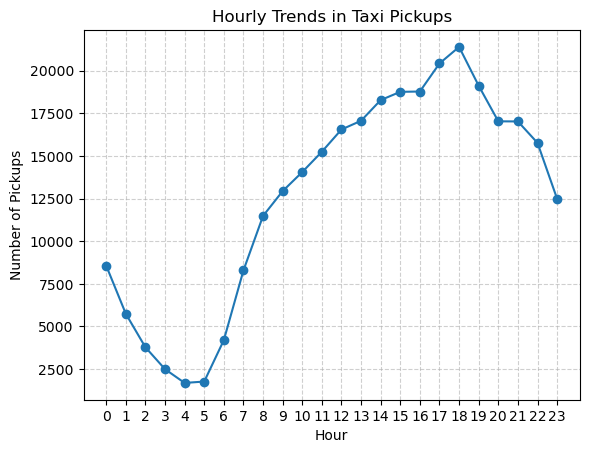

In [61]:
# Find and show the hourly trends in taxi pickups
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['month'] = df['tpep_pickup_datetime'].dt.month
df['month_name'] = df['tpep_pickup_datetime'].dt.month_name()

hourly_trend = df.groupby('hour').size()
plt.title('Hourly Trends in Taxi Pickups')
plt.plot(hourly_trend, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#  From the trend it is clear that evening hours are when we get more trips(2PM to 8PM)


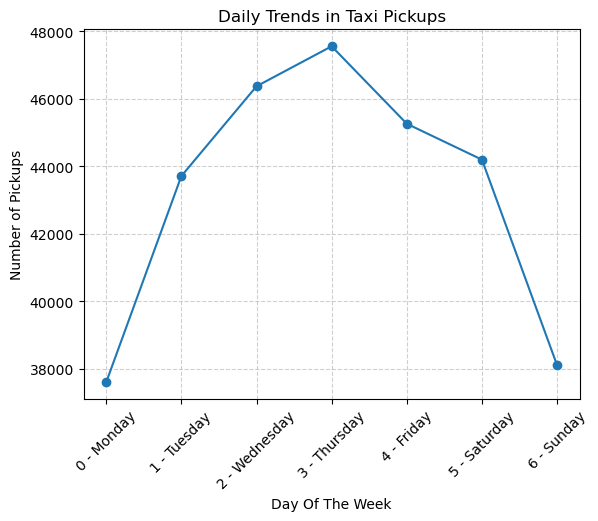

In [62]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
df['day_name'] = df['tpep_pickup_datetime'].dt.day_name() 

daily_trend = df.groupby(['day_of_week', 'day_name']).size().reset_index(name='count')
daily_trend['day_label'] = daily_trend['day_of_week'].astype(str) + ' - ' + daily_trend['day_name']
daily_trend = daily_trend.sort_values(by='day_of_week')

plt.title('Daily Trends in Taxi Pickups')
plt.plot(daily_trend['day_of_week'], daily_trend['count'], marker='o', linestyle='-')
plt.xlabel('Day Of The Week')
plt.ylabel('Number of Pickups')
plt.xticks(daily_trend['day_of_week'], labels=daily_trend['day_label'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Monday and Sunday have the lowest pick up count. With Tuesday to Saturday having high pickups.
# Wedneday, Thursday and Fridary have highest pick up counts.


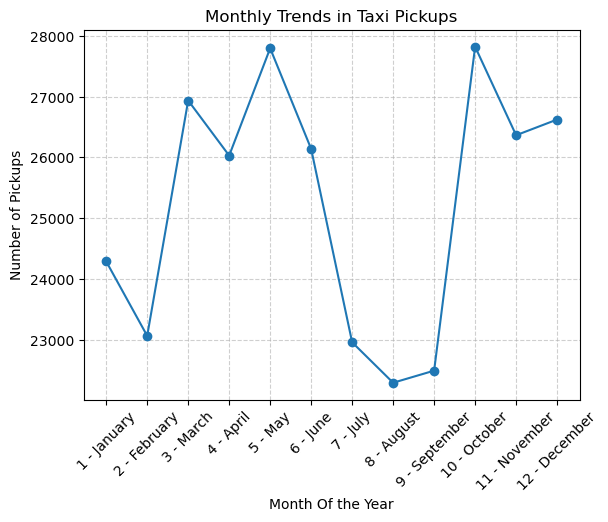

In [63]:
# Show the monthly trends in pickups
df['month'] = df['tpep_pickup_datetime'].dt.month
df['month_name'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_trend = df.groupby(['month', 'month_name']).size().reset_index(name='count')
monthly_trend['month_label'] = monthly_trend['month'].astype(str) + ' - ' + monthly_trend['month_name']
monthly_trend = monthly_trend.sort_values(by='month')

plt.title('Monthly Trends in Taxi Pickups')
plt.plot(monthly_trend['month'], monthly_trend['count'], marker='o', linestyle='-')
plt.xlabel('Month Of the Year')
plt.ylabel('Number of Pickups')
plt.xticks(monthly_trend['month'], labels=monthly_trend['month_label'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Highest pick up happened in Month of May & October
# There is significant drop in pick ups between Jan & Feb. Probably due to high winter and people venturing less outside.
# July, August & September also have less pickups. Can it be due to summer season and people are out vacationing?


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [64]:
# Analyse the above parameters
#  We will drop total amount less than or equal to zero
df[(df["total_amount"] <= 0)] 

#  we will drop fare amount less than or equal to zero
df[df["fare_amount"] <= 0]

# we will drop trip distance less than or equal to zero and Pick up and Drop off location are different
df[(df["trip_distance"] <=0) & (df['PULocationID'] != df['DOLocationID'])]

# We will not drop tip_amount = 0 as count is greater than 70,000 from the sample. We will drop them when we do analysis
df[df["tip_amount"] <= 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   
5              2  2023-01-17 00:46:57   2023-01-17 00:51:21              1.0   
17             1  2023-01-08 00:04:26   2023-01-08 00:27:46              2.0   
18             2  2023-01-09 00:54:18   2023-01-09 00:57:54              3.0   
19             1  2023-01-15 00:01:07   2023-01-15 00:10:46              3.0   
...          ...                  ...                   ...              ...   
303421         2  2023-09-20 23:35:49   2023-09-21 00:20:06              1.0   
303423         1  2023-09-02 23:12:57   2023-09-02 23:35:47              1.0   
303424         2  2023-09-01 23:30:56   2023-09-01 23:39:31              1.0   
303428         2  2023-09-17 23:44:58   2023-09-18 00:08:33              1.0   
303431         2  2023-09-01 23:02:10   2023-09-01 23:16:56              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                3.34         1.0                  N           132   
5                1.34         1.0                  N           170   
17              15.70         1.0                  N           132   
18               1.00         1.0                  N           234   
19               1.80         1.0                  N           249   
...               ...         ...                ...           ...   
303421          17.75         2.0                  N           132   
303423           0.00         1.0                  N            87   
303424           1.27         1.0                  N           249   
303428          14.50         1.0                  N           132   
303431           3.72         1.0                  N           145   

        DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
4                132             2  ...          0.00                    1.0   
5                162             2  ...          0.00                    1.0   
17               123             2  ...          0.00                    1.0   
18               230             2  ...          0.00                    1.0   
19               231             1  ...          0.00                    1.0   
...              ...           ...  ...           ...                    ...   
303421           100             2  ...          6.94                    1.0   
303423           148             0  ...          0.00                    1.0   
303424            79             2  ...          0.00                    1.0   
303428           226             2  ...          0.00                    1.0   
303431           157             4  ...          0.00                    1.0   

        total_amount  congestion_surcharge  hour  Airport_Fee  month  \
4              19.35                   0.0     0         1.25      1   
5              12.90                   2.5     0         0.00      1   
17             62.75                   0.0     0         1.25      1   
18             11.50                   2.5     0         0.00      1   
19             16.40                   2.5     0         0.00      1   
...              ...                   ...   ...          ...    ...   
303421         82.69                   2.5    23         1.75      9   
303423         23.36                   0.0    23         0.00      9   
303424         15.00                   2.5    23         0.00      9   
303428         59.75                   0.0    23         1.75      9   
303431         21.60                   0.0    23         0.00      9   

        month_name  day_of_week   day_name  
4          January            1    Tuesday  
5          January            1    Tuesday  
17         January            6     Sunday  
18         January            0     Monday  
19         January            6     Sunday  
...            ...          ...        ...  
303421   September            2  Wednesday  
303423   September  

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [76]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[~(df["total_amount"] <= 0)] 

#  we will drop fare amount less than or equal to zero
df_non_zero = df[~(df["fare_amount"] <= 0)]

# we will drop trip distance less than or equal to zero and Pick up and Drop off location are different
df_non_zero =  df[~((df["trip_distance"] <=0) & (df['PULocationID'] != df['DOLocationID']))]

# We will not drop tip_amount = 0 as count is greater than 70,000 from the sample. We will drop them when we do analysis
# df_non_zero = df[~(df["tip_amount"] <= 0)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

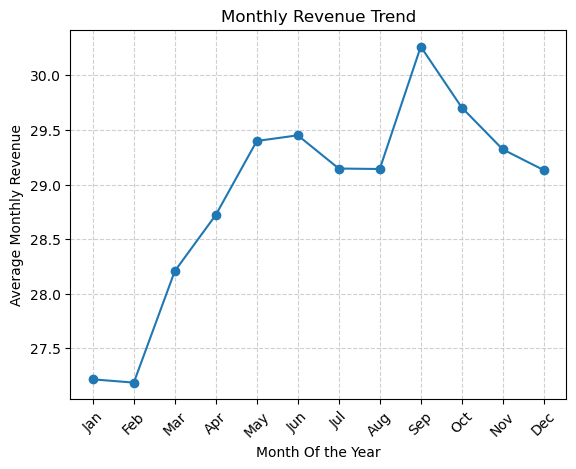

In [77]:
# Group data by month and analyse monthly revenue
monthly_trend = df_non_zero.groupby(['month', 'month_name'])['total_amount'].mean().reset_index(name='mean')
monthly_trend['month_label'] = monthly_trend['month_name'].str[:3]
monthly_trend = monthly_trend.sort_values(by='month')

plt.title('Monthly Revenue Trend')
plt.plot(monthly_trend['month'], monthly_trend['mean'], marker='o', linestyle='-')
plt.xlabel('Month Of the Year')
plt.ylabel('Average Monthly Revenue')
plt.xticks(monthly_trend['month'], labels=monthly_trend['month_label'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# January and February has the lowest average revenue.
# September revenue has definitely a peak
# All the other months are more or less good

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

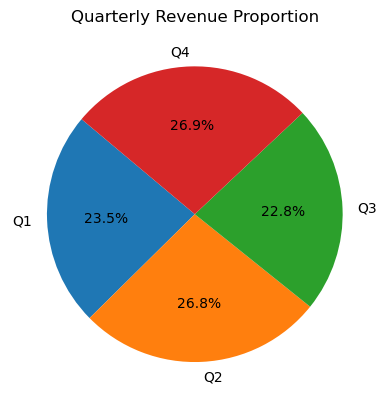

In [78]:
# Calculate proportion of each quarter
month_to_quarter = {
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
}

df_non_zero['quarter'] = df_non_zero['month'].map(month_to_quarter)

quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()

quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100
# Plotting a pie chart to get the proportion
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], 
        autopct='%1.1f%%',  startangle=140)

plt.title('Quarterly Revenue Proportion')
plt.show()

#  Q4 & Q2 has the highest revenue share almost equalling 27%
#  Q1 & Q3 are laggards with Q3 has the lowest share among all the quarters


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

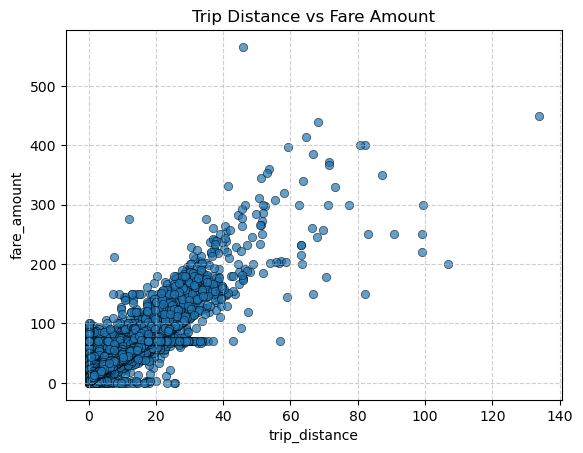

In [79]:
# Show how trip fare is affected by distance

# Removing all 0 values from trip distance
df_non_zero_trip_distance = df_non_zero[~(df_non_zero['trip_distance'] == 0)]

sns.scatterplot(data=df_non_zero_trip_distance, x='trip_distance', y='fare_amount', alpha=0.7, edgecolor='k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Trip Distance vs Fare Amount')
plt.show()

# Using scatter plot to visualize the relationship between trip distance and fare amount. We can notice that trip distance is proportional to fare amount
# Most of the trip distance is withing 40 miles & fare amount is withing 200 dollars

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

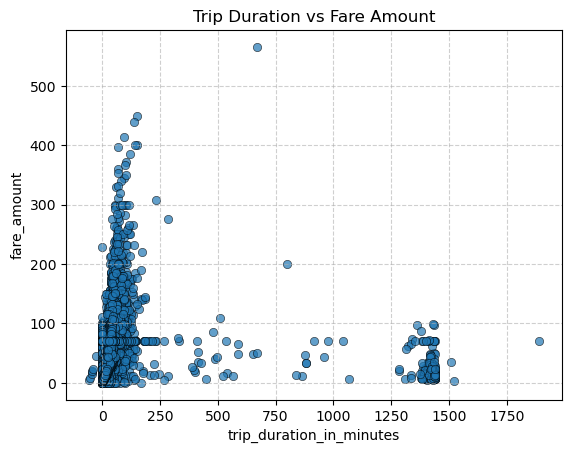

In [80]:
# Show relationship between fare and trip duration
# Adding a new column to get trip duration in minutes
df_non_zero_trip_distance['trip_duration_in_minutes'] = (df_non_zero_trip_distance['tpep_dropoff_datetime'] - df_non_zero_trip_distance['tpep_pickup_datetime']).dt.total_seconds() / 60

# Again using scatter plot to find the relation between two.
sns.scatterplot(data=df_non_zero_trip_distance, x='trip_duration_in_minutes', y='fare_amount', alpha=0.7, edgecolor='k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Trip Duration vs Fare Amount')
plt.show()

# From the scatter plot we can deduce that the trip duration do not have significant relation witht the fare amount. We can clearly see 
# from trip duration that for the same duration the fare amount can even reach 400 dollars or even less than 10 dollars.


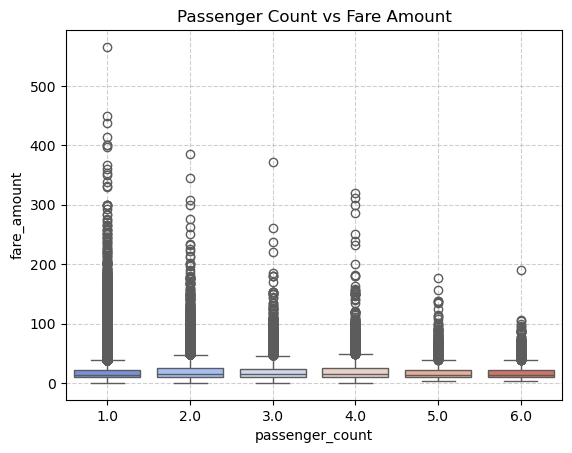

In [81]:
# Show relationship between fare and number of passengers

# Using boxplot to find the relation between two.
sns.boxplot(data=df_non_zero_trip_distance, x='passenger_count', y='fare_amount', palette='coolwarm')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Passenger Count vs Fare Amount')
plt.show()

# From the box plot it is evident that there is no definite relationship between two. Ther are huge number of outliers with 75 percentile and above


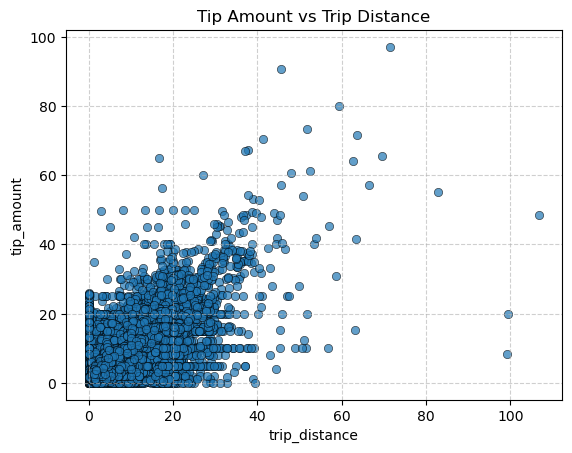

In [83]:
# Show relationship between tip and trip distance

df_non_zero_tip = df_non_zero[~(df_non_zero["tip_amount"] <= 0)]

sns.scatterplot(data=df_non_zero_tip, x='trip_distance', y='tip_amount', alpha=0.7, edgecolor='k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Tip Amount vs Trip Distance')
plt.show()

# There is not much correlation between tip amount and trip_distance. It looks more like a customer choice. 


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

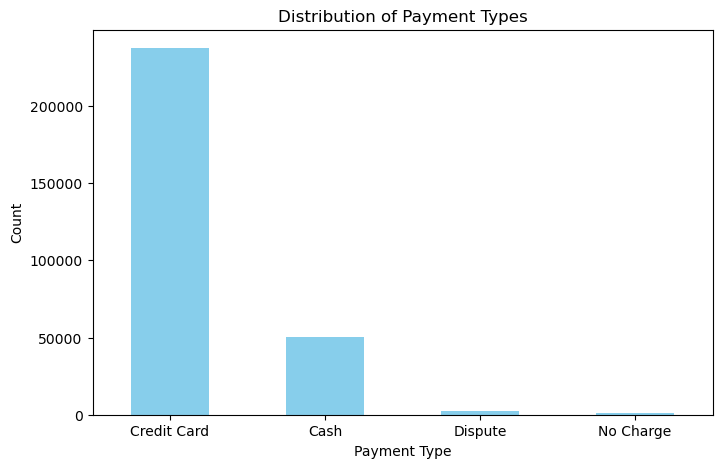

payment_type_desc
Credit Card    237573
Cash            50094
Dispute          2188
No Charge        1331
Name: count, dtype: int64

In [84]:
# Analyse the distribution of different payment types (payment_type).

# payment mapping
payment_mapping  = {1: "Credit Card", 2: "Cash", 3: "No Charge", 4: "Dispute", 5: "Unknown", 6: "Voided Trip"}

# Count occurrences of each payment type
df_non_zero['payment_type_desc'] = df_non_zero["payment_type"].map(payment_mapping)
payment_counts = df_non_zero["payment_type_desc"].value_counts()

# Plot Bar Chart
plt.figure(figsize=(8, 5))
payment_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

# Credit card usage is overwhelming, with next preferred payment option being Cash
# 'Unknown' and 'Voided' types are non existent.
# Count of Dispute and no charge are virtually insignificant
df_non_zero["payment_type_desc"].value_counts()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [85]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [86]:
import geopandas as gpd


# Read the shapefile using geopandas
print(os.getcwd())
os.chdir('taxi_zones')
zones = gpd.read_file('taxi_zones.shp')
zones.head()

# Changing the directory back to the default(where the jupyter file is kept)
os.chdir(parent_working_directory)
print(os.getcwd()) 

C:\Users\Admin\Downloads\Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi
C:\Users\Admin\Downloads\Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

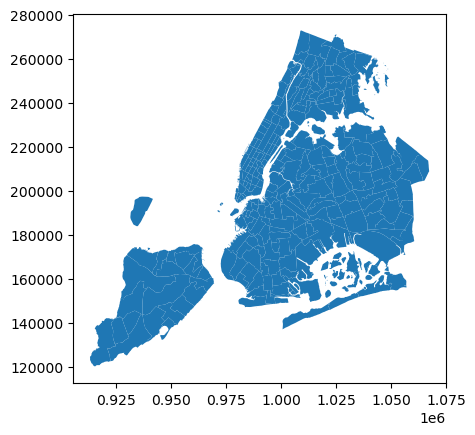

In [87]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [88]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df_non_zero, zones, left_on='PULocationID', right_on='LocationID', how='inner')
merged_df.drop(columns=['LocationID'], inplace=True)
merged_df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  day_of_week  day_name  quarter  payment_type_desc  \
0             1  ...            1   Tuesday       Q1        Credit Card   
1             1  ...            6    Sunday       Q1        Credit Card   
2             1  ...            6    Sunday       Q1        Credit Card   
3             1  ...            5  Saturday       Q1        Credit Card   
4             2  ...            1   Tuesday       Q1               Cash   

   OBJECTID  Shape_Leng  Shape_Area                     zone    borough  \
0       142    0.038176    0.000076      Lincoln Square East  Manhattan   
1       113    0.032745    0.000058  Greenwich Village North  Manhattan   
2       263    0.037017    0.000066           Yorkville West  Manhattan   
3        79    0.042625    0.000108             East Village  Manhattan   
4       132    0.245479    0.002038              JFK Airport     Queens   

                                            geometry  
0  POLYGON ((989380.305 218980.247, 989359.803 21...  
1  POLYGON ((986643.64 204346.324, 986592.535 204...  
2  POLYGON ((997493.323 220912.386, 997355.264 22...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [89]:
# Group data by location and calculate the number of trips
grouped_df = merged_df.groupby('PULocationID').size().reset_index(name='count')
grouped_df.head()


PULocationID  count
0             1     14
1             3      4
2             4    336
3             5      2
4             6      2

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [90]:
# Merge trip counts back to the zones GeoDataFrame
merged_zones_df = zones.merge(grouped_df, left_on='LocationID', right_on='PULocationID', how='inner')
merged_zones_df.drop(columns=['PULocationID'], inplace=True)
merged_zones_df.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         5    0.092146    0.000498            Arden Heights           5   
4         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   

         borough                                           geometry  count  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...     14  
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...      4  
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    336  
3  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...      2  
4  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      2

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

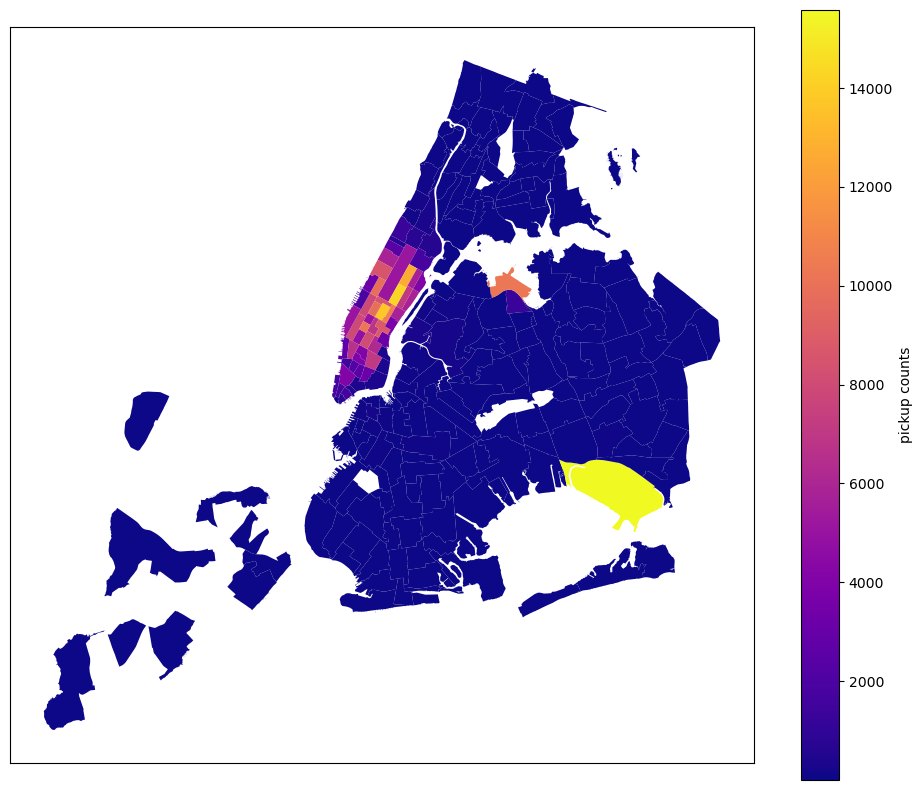

In [94]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_zones_df.plot(column = 'count',
                    ax = ax,
                    legend = True,
                    cmap='plasma',
                    legend_kwds = {'label': "pickup counts", 'orientation': "vertical"})
# Plot the map and display it
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_xticklabels([])  
ax.set_yticklabels([]) 
plt.show()



In [95]:
# can you try displaying the zones DF sorted by the number of trips?
merged_zones_df_sorted = merged_zones_df.sort_values(by="count", ascending=False)
merged_zones_df_sorted.head(50)


OBJECTID  Shape_Leng  Shape_Area                           zone  \
115       132    0.245479    0.002038                    JFK Airport   
212       237    0.042213    0.000096          Upper East Side South   
143       161    0.035804    0.000072                 Midtown Center   
211       236    0.044252    0.000103          Upper East Side North   
144       162    0.035270    0.000048                   Midtown East   
121       138    0.107467    0.000537              LaGuardia Airport   
165       186    0.024696    0.000037   Penn Station/Madison Sq West   
205       230    0.031028    0.000056      Times Sq/Theatre District   
125       142    0.038176    0.000076            Lincoln Square East   
152       170    0.045769    0.000074                    Murray Hill   
214       239    0.063626    0.000205          Upper West Side South   
145       163    0.034177    0.000041                  Midtown North   
209       234    0.036072    0.000073                       Union Sq   
42         48    0.043747    0.000094                   Clinton East   
60         68    0.049337    0.000111                   East Chelsea   
71         79    0.042625    0.000108                   East Village   
124       141    0.041514    0.000077                Lenox Hill West   
146       164    0.035772    0.000056                  Midtown South   
223       249    0.036384    0.000072                   West Village   
93        107    0.038041    0.000075                       Gramercy   
123       140    0.047584    0.000114                Lenox Hill East   
213       238    0.060109    0.000185          Upper West Side North   
204       229    0.042525    0.000095  Sutton Place/Turtle Bay North   
236       263    0.037017    0.000066                 Yorkville West   
37         43    0.099739    0.000380                   Central Park   
220       246    0.069467    0.000281      West Chelsea/Hudson Yards   
89        100    0.024813    0.000037               Garment District   
81         90    0.030759    0.000055                       Flatiron   
206       231    0.063420    0.000167           TriBeCa/Civic Center   
235       262    0.049064    0.000122                 Yorkville East   
97        113    0.032745    0.000058        Greenwich Village North   
98        114    0.031727    0.000047        Greenwich Village South   
208       233    0.048036    0.000116            UN/Turtle Bay South   
126       143    0.054180    0.000151            Lincoln Square West   
120       137    0.046108    0.000116                       Kips Bay   
131       148    0.039131    0.000070                Lower East Side   
140       158    0.054810    0.000186  Meatpacking/West Village West   
127       144    0.027620    0.000047            Little Italy/NoLiTa   
134       151    0.054890    0.000129               Manhattan Valley   
187       211    0.025235    0.000040                           SoHo   
44         50    0.055748    0.000173                   Clinton West   
67         75    0.087664    0.000241              East Harlem South   
10         13    0.050281    0.000149              Battery Park City   
78         87    0.036902    0.000067       Financial District North   
234       261    0.027120    0.000034             World Trade Center   
108       125    0.049732    0.000076                      Hudson Sq   
62         70    0.063840    0.000195                  East Elmhurst   
148       166    0.068824    0.000255            Morningside Heights   
79         88    0.035205    0.000057       Financial District South   
21         24    0.047000    0.000061                   Bloomingdale   

     LocationID    borough                                           geometry  \
115         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
212         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
143         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
211     

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [96]:
# Find routes which have the slowest speeds at different times of the day
merged_df['trip_duration_hours'] = (merged_df["tpep_dropoff_datetime"] - merged_df["tpep_pickup_datetime"]).dt.total_seconds() / (60 * 60)
merged_df['trip_speed'] = merged_df['trip_distance']/merged_df['trip_duration_hours']

grouped_location = merged_df.groupby(['PULocationID','DOLocationID','hour'])['trip_speed'].mean().reset_index(name='avg_trip_speed').sort_values(by='avg_trip_speed')
grouped_location_positive_speed = grouped_location[grouped_location['avg_trip_speed'] > 0]

grouped_location_positive_speed.head(10)


PULocationID  DOLocationID  hour  avg_trip_speed
46359           207           132    12        0.000394
47409           211           211     4        0.012199
12061            80            80    22        0.016690
47821           217           256     0        0.026473
62774           261            12    12        0.027681
46170           193           193    17        0.027907
20478           125           144     1        0.039316
38818           162           138    22        0.039432
13441            88           231    17        0.040063
19953           116           116    13        0.043202

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

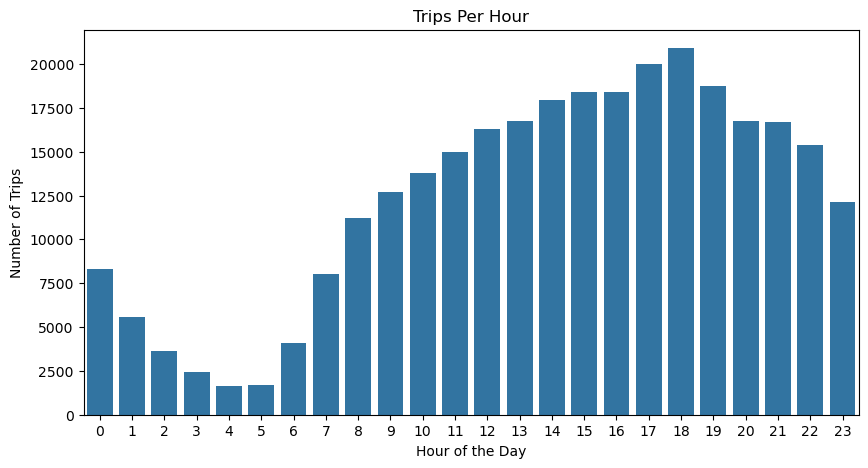

hour  trip_count
0     0        8312
1     1        5583
2     2        3657
3     3        2418
4     4        1621

In [97]:
# Visualise the number of trips per hour and find the busiest hour

trip_counts = merged_df.groupby("hour").size().reset_index(name='trip_count')
plt.figure(figsize=(10, 5))
sns.barplot(x=trip_counts["hour"], y=trip_counts["trip_count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips Per Hour")
plt.xticks(range(24)) 
plt.show()
trip_counts.head()

#  Busiest hour has been 6PM. Technically from 6:00PM to 6:59:59 PM

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [98]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.008
trip_counts['scaled_count'] = trip_counts['trip_count'] / sample_fraction
trip_counts['scaled_count'] = trip_counts['scaled_count'].astype(int)

trip_counts.sort_values(by='scaled_count', ascending = False, inplace=True)
trip_counts.head()

# hours between 15 to 19 are the busiest(19 can include 19:59 as well)



hour  trip_count  scaled_count
18    18       20909       2613625
17    17       20002       2500250
19    19       18724       2340500
16    16       18413       2301625
15    15       18399       2299875

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

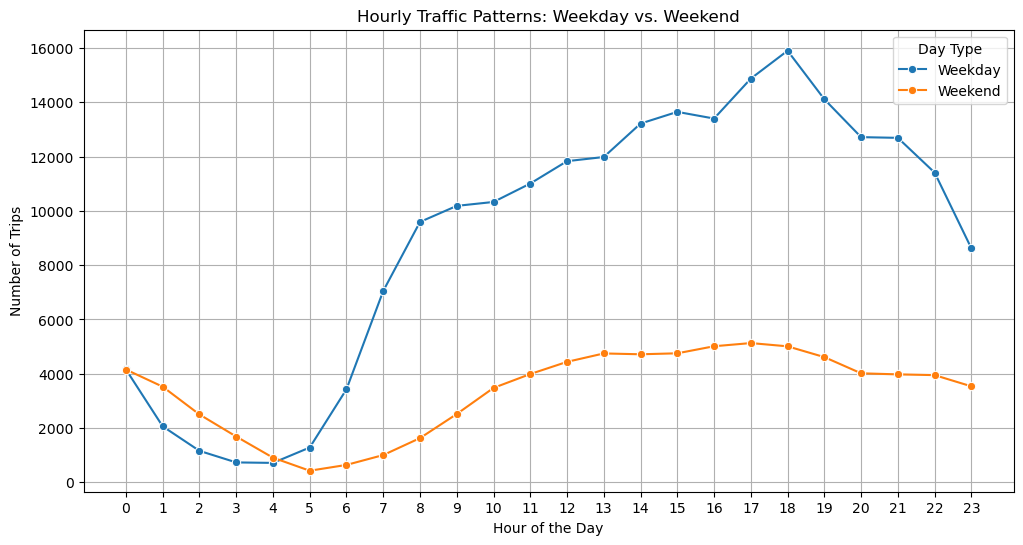

In [99]:
# Compare traffic trends for the week days and weekends

merged_df["day_type"] = merged_df["day_of_week"].apply(lambda x: "Weekday" if x < 5 else "Weekend")
hourly_trips = merged_df.groupby(["hour", "day_type"]).size().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="trip_count", hue="day_type", data=hourly_trips, marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Patterns: Weekday vs. Weekend")
plt.xticks(range(24))
plt.legend(title="Day Type")
plt.grid(True)
plt.show()


# For weekend the trend is more like a flat trend. As people are not working they can go out at any time
# For weekdays we can see a trend increasing at 2PM and peaking at 6PM and then tapering off. This indicates the non office hours

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

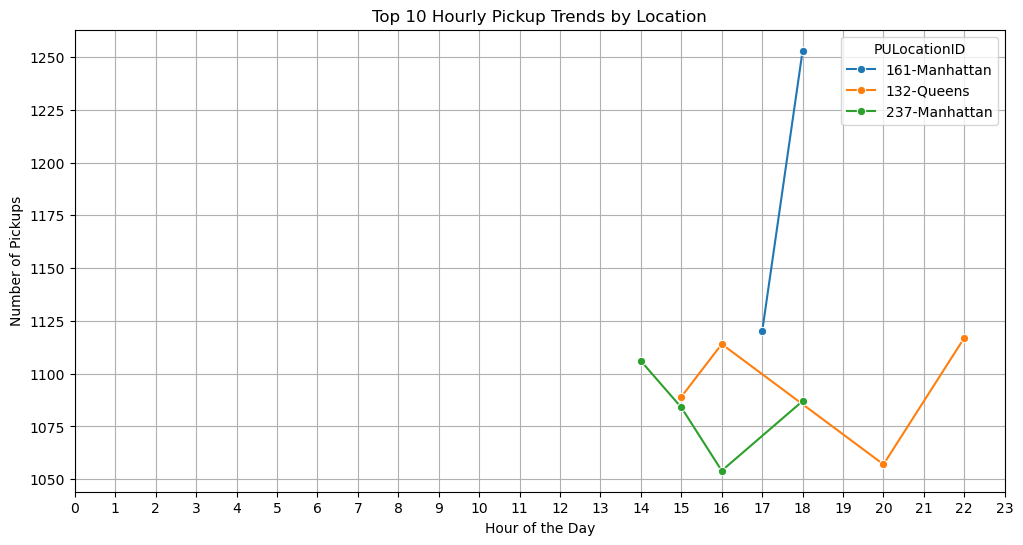

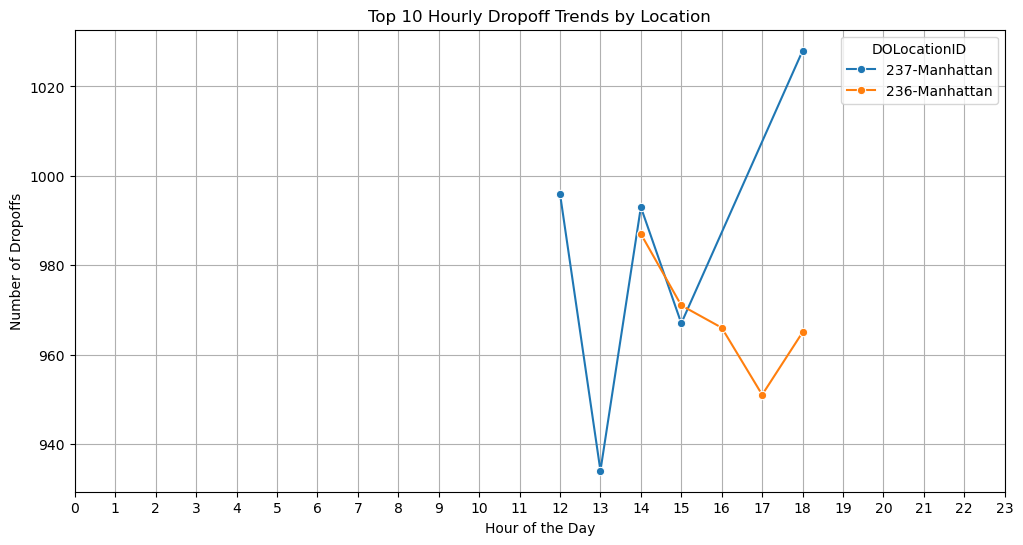

In [100]:
# Find top 10 pickup and dropoff zones

top_pickup = merged_df.groupby(["hour","PULocationID"]).size().nlargest(10).reset_index(name='pickup_count')
top_pickup = pd.merge(top_pickup, zones[['borough','LocationID']], left_on='PULocationID', right_on='LocationID', how='inner')
top_pickup = top_pickup.drop(columns=['LocationID'])
top_pickup['PULocationID'] = top_pickup['PULocationID'].astype(str) + '-' + top_pickup['borough']


plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="pickup_count", hue="PULocationID", data=top_pickup, marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Hourly Pickup Trends by Location")
plt.xticks(range(24))
plt.legend(title="PULocationID")
plt.grid(True)
plt.show()

top_dropoff = merged_df.groupby(["hour","DOLocationID"]).size().nlargest(10).reset_index(name='dropoff_count')
top_dropoff = pd.merge(top_dropoff, zones[['borough','LocationID']], left_on='DOLocationID', right_on='LocationID', how='inner')
top_dropoff = top_dropoff.drop(columns=['LocationID'])
top_dropoff['DOLocationID'] = top_dropoff['DOLocationID'].astype(str) + '-' + top_dropoff['borough']
top_dropoff

plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="dropoff_count", hue="DOLocationID", data=top_dropoff, marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Hourly Dropoff Trends by Location")
plt.xticks(range(24))
plt.legend(title="DOLocationID")
plt.grid(True)
plt.show()

# It is notable that 161-Manhattan has the highest pickup count at 6PM. Probably most of the office locations being there.
# 237-Manhattan also has a huge number of drop offs. It could be that that zone is residential. The drop off peaks at 6PM as well

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [101]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_count = merged_df.groupby(["PULocationID"]).size().reset_index(name='pickup_count')
dropoff_count = merged_df.groupby(["DOLocationID"]).size().reset_index(name='dropoff_count')

count_ratio = pd.merge(pickup_count, dropoff_count, left_on = 'PULocationID', right_on = 'DOLocationID', how='inner' )
count_ratio['pickup_dropoff_ratio'] = count_ratio['pickup_count'] / count_ratio['dropoff_count']


top_10_ratio = count_ratio.nlargest(10, 'pickup_dropoff_ratio')
bottom_10_ratio = count_ratio.nsmallest(10, 'pickup_dropoff_ratio')

print("Top 10 pick up drop off ratio:\n", top_10_ratio)
print("\nBottom 10 Pickup drop off ratio:\n", bottom_10_ratio)

# For places with huge pick up drop off ratio we should make more taxis available there as ther is significant pickups


Top 10 pick up drop off ratio:
      PULocationID  pickup_count  DOLocationID  dropoff_count  \
61             70          1338            70            156   
114           132         15579           132           3700   
120           138         10298           138           3834   
164           186         10172           186           6561   
37             43          5124            43           3647   
97            114          3916           114           2834   
222           249          6639           249           4905   
88            100          5035           100           4046   
143           162         10652           162           8645   
70             79          7113            79           6009   

     pickup_dropoff_ratio  
61               8.576923  
114              4.210541  
120              2.685968  
164              1.550373  
37               1.404990  
97               1.381793  
222              1.353517  
88               1.244439  
143        

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [102]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Note that hour 5 is not included as it basically can contain everything till 5:59
merged_df_11pm_5am = merged_df[merged_df['hour'].isin([23,0,1,2,3,4]) ] 
pickup_zones = merged_df_11pm_5am.groupby(["hour","PULocationID"]).size().reset_index(name='pickup_count').nlargest(10,'pickup_count')
dropoff_zones = merged_df_11pm_5am.groupby(["hour","DOLocationID"]).size().reset_index(name='dropoff_count').nlargest(10,'dropoff_count')

print("Top 10 pickup zones between 11pm and 5am:\n", pickup_zones)
print("\nTop 10 Dropoff zones between 11pm and 5am:\n", dropoff_zones)


Top 10 pickup zones between 11pm and 5am:
      hour  PULocationID  pickup_count
578    23           132           947
52      0           132           631
581    23           138           603
31      0            79           601
640    23           249           577
558    23            79           571
140     1            79           550
107     0           249           544
543    23            48           510
626    23           230           494

Top 10 Dropoff zones between 11pm and 5am:
       hour  DOLocationID  dropoff_count
958     23            79            411
929     23            48            397
1034    23           170            356
1007    23           141            339
1115    23           263            326
1091    23           236            318
63       0            79            311
1085    23           230            305
1094    23           239            298
981     23           107            297


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [103]:
# Filter for night hours (11 PM to 5 AM)

# Note that hour 5 is not included as it basically includes time from 5:00AM to 5:59AM
night_hours = [23,0,1,2,3,4] 
night_time_df = merged_df[merged_df['hour'].isin(night_hours)]
day_time_df = merged_df[~(merged_df['hour'].isin(night_hours))]

total_revenue = merged_df['fare_amount'].sum()

# Calculate night-time and daytime revenue
night_revenue = night_time_df['fare_amount'].sum()
day_revenue = day_time_df['fare_amount'].sum()

# Calculate revenue share
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Night-time Revenue Share (11PM-5AM): {night_share:.2f}%")
print(f"Day-time Revenue Share (5AM-11PM): {day_share:.2f}%")


Night-time Revenue Share (11PM-5AM): 11.44%
Day-time Revenue Share (5AM-11PM): 88.56%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [104]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df['average_fare_per_mile_per_passenger'] = (merged_df['fare_amount']/ merged_df['trip_distance'])/merged_df['passenger_count']
merged_df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  OBJECTID  Shape_Leng  Shape_Area  \
0             1  ...       142    0.038176    0.000076   
1             1  ...       113    0.032745    0.000058   
2             1  ...       263    0.037017    0.000066   
3             1  ...        79    0.042625    0.000108   
4             2  ...       132    0.245479    0.002038   

                      zone    borough  \
0      Lincoln Square East  Manhattan   
1  Greenwich Village North  Manhattan   
2           Yorkville West  Manhattan   
3             East Village  Manhattan   
4              JFK Airport     Queens   

                                            geometry  trip_duration_hours  \
0  POLYGON ((989380.305 218980.247, 989359.803 21...             0.120556   
1  POLYGON ((986643.64 204346.324, 986592.535 204...             0.171389   
2  POLYGON ((997493.323 220912.386, 997355.264 22...             0.220833   
3  POLYGON ((988746.067 202151.955, 988733.885 20...             0.209444   
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...             0.139722   

   trip_speed  day_type  average_fare_per_mile_per_passenger  
0   16.341014   Weekday                             5.431472  
1    8.752026   Weekend                             6.666667  
2   11.773585   Weekend                             3.000000  
3    8.546419   Weekend                             7.541899  
4   23.904573   Weekday                             4.670659  

[5 rows x 36 columns]

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

   day_of_week  average_fare_per_mile
0            0              10.980044
1            1              11.278104
2            2              11.763528
3            3              10.429924
4            4              10.673941
5            5              10.906489
6            6              11.419649
    hour  average_fare_per_mile
0      0              11.599277
1      1               8.040284
2      2               8.151291
3      3              10.606580
4      4               8.783083
5      5               9.892501
6      6              12.341958
7      7               8.374123
8      8              11.780273
9      9              12.804907
10    10               9.454441
11    11              11.119701
12    12              11.265121
13    13              12.033064
14    14              10.842961
15    15              11.527870
16    16              14.140677
17    17              12.185069
18    18              10.194118
19    19              12.797609
20    20               9

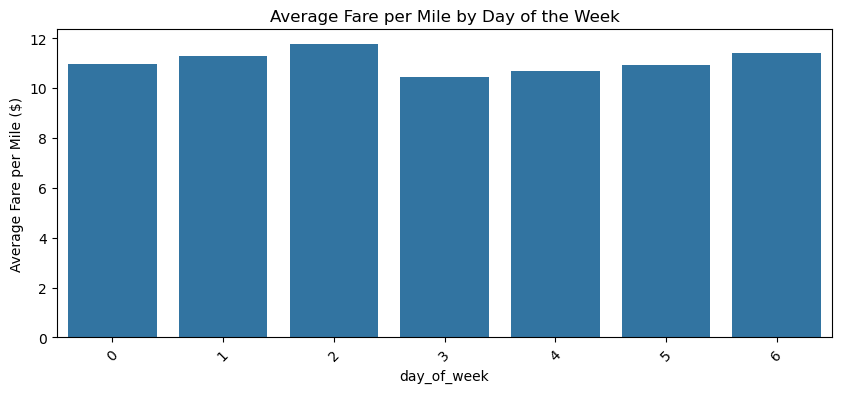

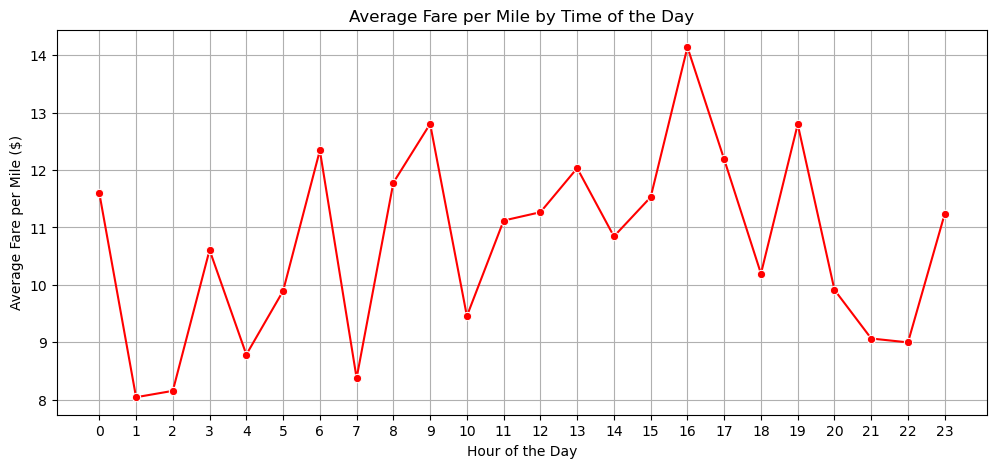

In [105]:
# Compare the average fare per mile for different days and for different times of the day

merged_df_non_zero_tripdistance = merged_df[merged_df['trip_distance'] > 0]
merged_df_non_zero_tripdistance['average_fare_per_mile'] = merged_df_non_zero_tripdistance['fare_amount']/ merged_df_non_zero_tripdistance['trip_distance']

avg_fare_per_mile_by_day = merged_df_non_zero_tripdistance.groupby('day_of_week')['average_fare_per_mile'].mean().reset_index()
print(avg_fare_per_mile_by_day)

avg_fare_per_mile_by_hour = merged_df_non_zero_tripdistance.groupby('hour')['average_fare_per_mile'].mean().reset_index()
print(avg_fare_per_mile_by_hour)

# Plot Average Fare per Mile for Different Days
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_fare_per_mile_by_day['day_of_week'], y=avg_fare_per_mile_by_day['average_fare_per_mile'])
plt.xticks(rotation=45)
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.show()

# Plot Average Fare per Mile for Different Hours
plt.figure(figsize=(12, 5))
sns.lineplot(x=avg_fare_per_mile_by_hour['hour'], y=avg_fare_per_mile_by_hour['average_fare_per_mile'], marker='o', color='red')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Time of the Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Average fare mile by the day of the week is more of less same. Not much significant difference

# Average fare mile by the hour of the day is quiet varying with 4PM being the highest. They are constantly varying by the hour and no definite trend is noted

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

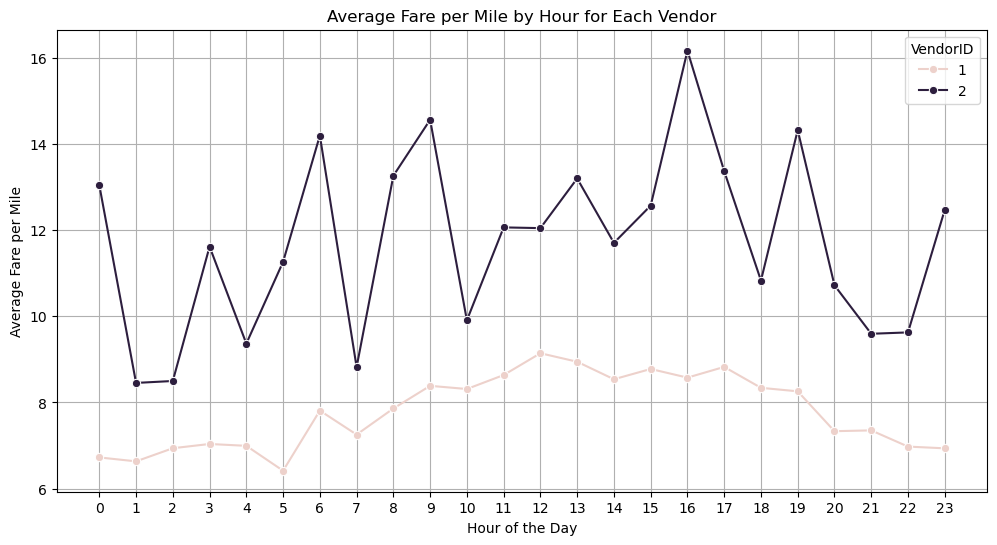

In [106]:
# Compare fare per mile for different vendors

vendor_hour_fare_per_mile = merged_df_non_zero_tripdistance.groupby(['VendorID','hour'])['average_fare_per_mile'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hour_fare_per_mile, x='hour', y='average_fare_per_mile', hue='VendorID', marker='o')

# Labels and Title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Hour for Each Vendor")
plt.xticks(range(0, 24)) 
plt.legend(title="VendorID")
plt.grid(True)
plt.show()

# Vendor #2 has significantly higher average fare per mile compared to Vendor #1

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


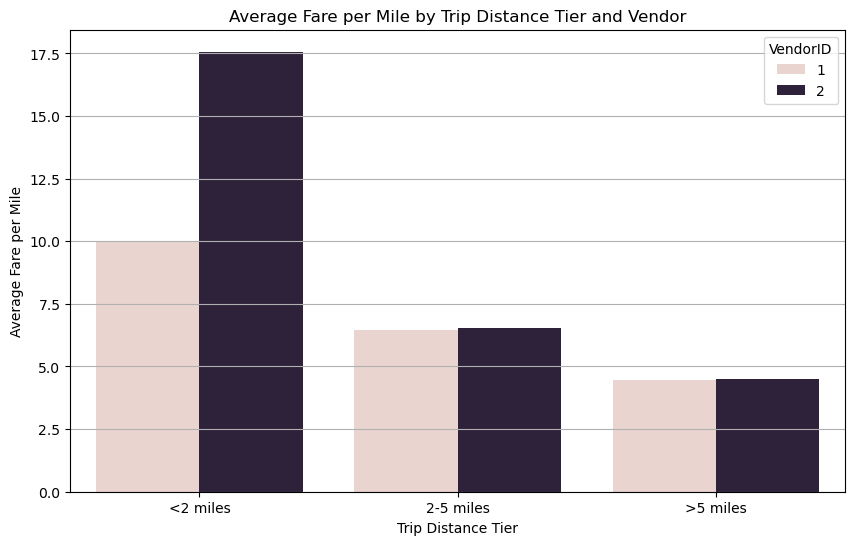

In [107]:
# Defining distance tiers

bins = [0, 2, 5, float('inf')]
labels = ['<2 miles', '2-5 miles', '>5 miles']

merged_df_non_zero_tripdistance['trip_distance_tier'] = pd.cut(merged_df_non_zero_tripdistance['trip_distance'], bins=bins, labels=labels, right=False)

tiered_data = merged_df_non_zero_tripdistance.groupby(['VendorID', 'trip_distance_tier'])['average_fare_per_mile'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_data, x='trip_distance_tier', y='average_fare_per_mile', hue='VendorID')
plt.xlabel("Trip Distance Tier")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Trip Distance Tier and Vendor")
plt.legend(title="VendorID")
plt.grid(axis='y')


# For less than 2 miles bucket Vendor #2 has higher average Fare per mile. For distances >2 both vendors are more of less the same

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

  trip_dist_category  tip_percentage
0           <2 miles       20.053816
1          2-5 miles       20.053914
2         5-10 miles       19.941556
3        10-20 miles       19.889607
4          >20 miles       20.418106


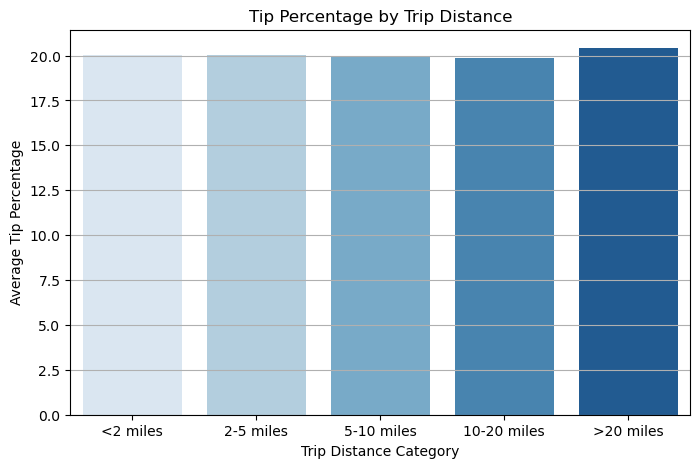

   passenger_count  tip_percentage
0              1.0       20.240022
1              2.0       19.588938
2              3.0       18.957266
3              4.0       17.170912
4              5.0       20.255298
5              6.0       20.497572


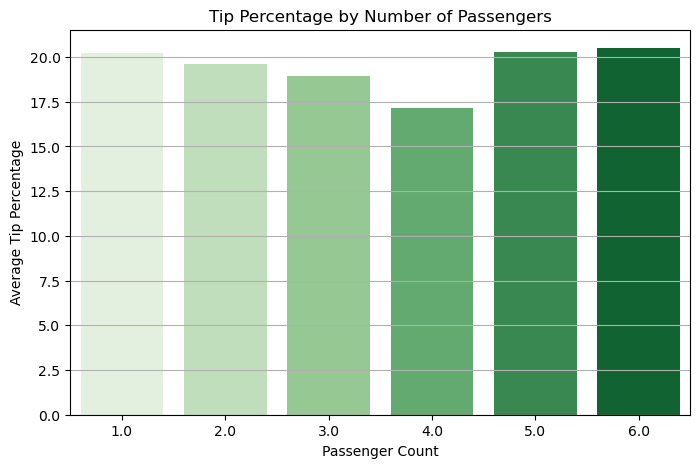

    hour  tip_percentage
0      0       19.890127
1      1       20.205255
2      2       19.831011
3      3       18.962836
4      4       16.735948
5      5       16.708566
6      6       17.879014
7      7       19.203012
8      8       19.668601
9      9       19.471727
10    10       18.996017
11    11       18.973086
12    12       18.976393
13    13       18.833379
14    14       18.727750
15    15       18.677887
16    16       20.563201
17    17       21.382392
18    18       21.824087
19    19       21.625801
20    20       21.248279
21    21       21.186747
22    22       20.908151
23    23       20.162775


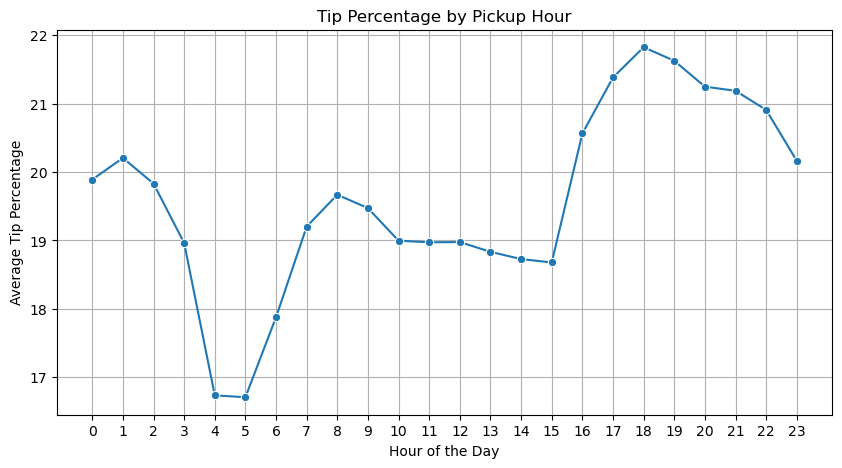

In [108]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# trip distance category
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['<2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '>20 miles']
merged_df['trip_dist_category'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, right=False)


tip_by_distance = merged_df.groupby('trip_dist_category')['tip_percentage'].mean().reset_index()
print(tip_by_distance)

plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_distance, x='trip_dist_category', y='tip_percentage', palette='Blues')
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Trip Distance")
plt.grid(axis='y')
plt.show()

tip_by_passengers = merged_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print(tip_by_passengers)

plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_passengers, x='passenger_count', y='tip_percentage', palette='Greens')

plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Number of Passengers")
plt.grid(axis='y')
plt.show()

tip_by_hour = merged_df.groupby('hour')['tip_percentage'].mean().reset_index()
print(tip_by_hour)

plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_hour, x='hour', y='tip_percentage', marker='o')

plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Pickup Hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# From the graph it is obvious that trip distance does not have much affect on the Average tip percentage

# For the evening hours the tip is higher comparitatively. Probably due to bar customers

# Passenger count again does not have much impact on tip percentage

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

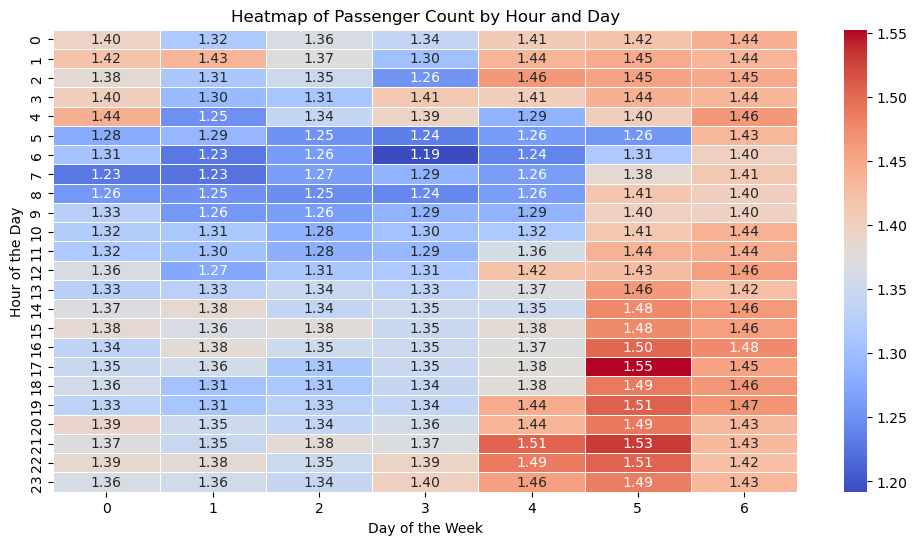

In [109]:
# See how passenger count varies across hours and days
passenger_heatmap = merged_df.groupby(['hour', 'day_of_week'])['passenger_count'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_heatmap, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.title("Heatmap of Passenger Count by Hour and Day")
plt.show()

# Friday Evenenings, and Weekends have higher passenger counts.

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



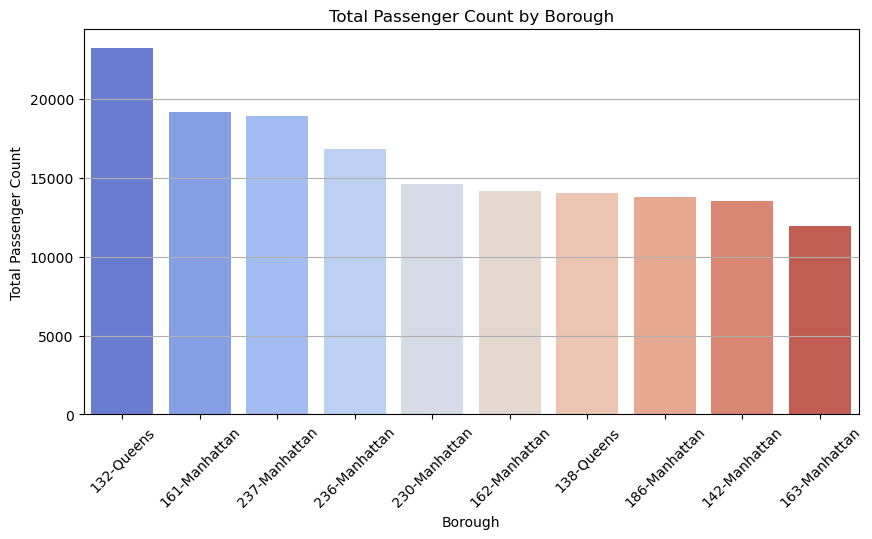

[]

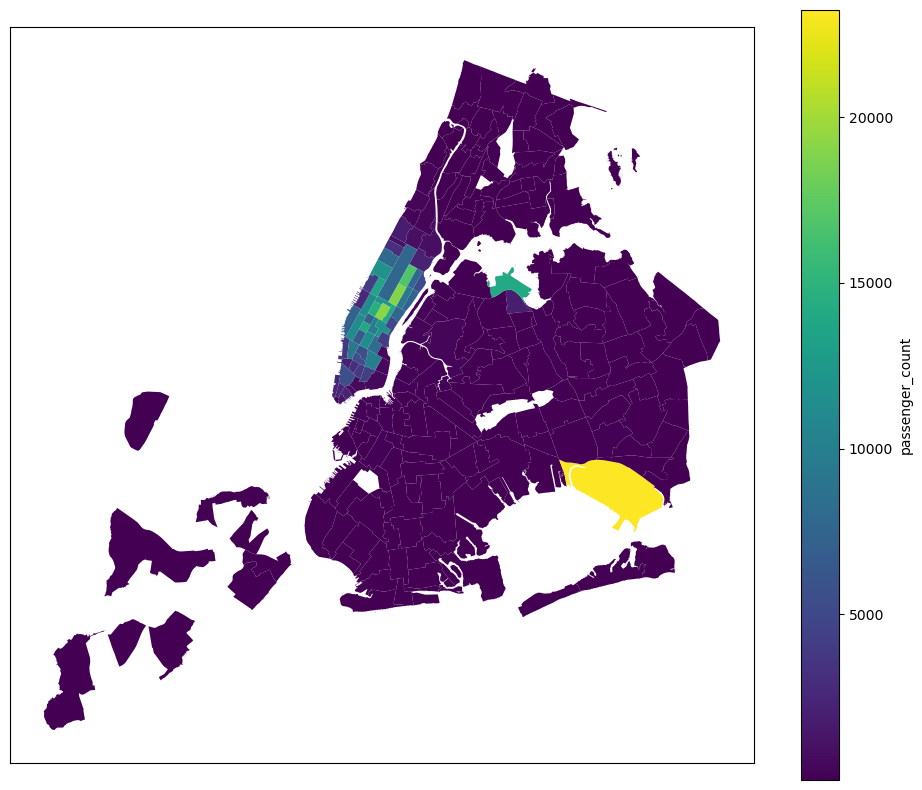

In [111]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
passenger_by_zone = merged_df.groupby(['PULocationID','borough'])['passenger_count'].sum().reset_index()
passenger_by_zone = passenger_by_zone.sort_values(by='passenger_count', ascending=False)

passenger_by_zone['borough_id_name'] = passenger_by_zone['PULocationID'].astype(str) + '-' + passenger_by_zone['borough']
top_zones = passenger_by_zone.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_zones, x="borough_id_name", y="passenger_count", palette="coolwarm")

plt.xlabel("Borough")
plt.ylabel("Total Passenger Count")
plt.title("Total Passenger Count by Borough")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


zones_passenger_count = zones.merge(passenger_by_zone, left_on="LocationID", right_on="PULocationID", how='inner')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_passenger_count.plot(column = 'passenger_count',
ax = ax,
legend = True,
legend_kwds = {'label': "passenger_count", 'orientation': "vertical"})
ax.set_xticks([]) 
ax.set_yticks([])  
ax.set_xticklabels([])  
ax.set_yticklabels([])  

#  132-Queens have the higher passenger counts. Probably due to both of the airport.


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

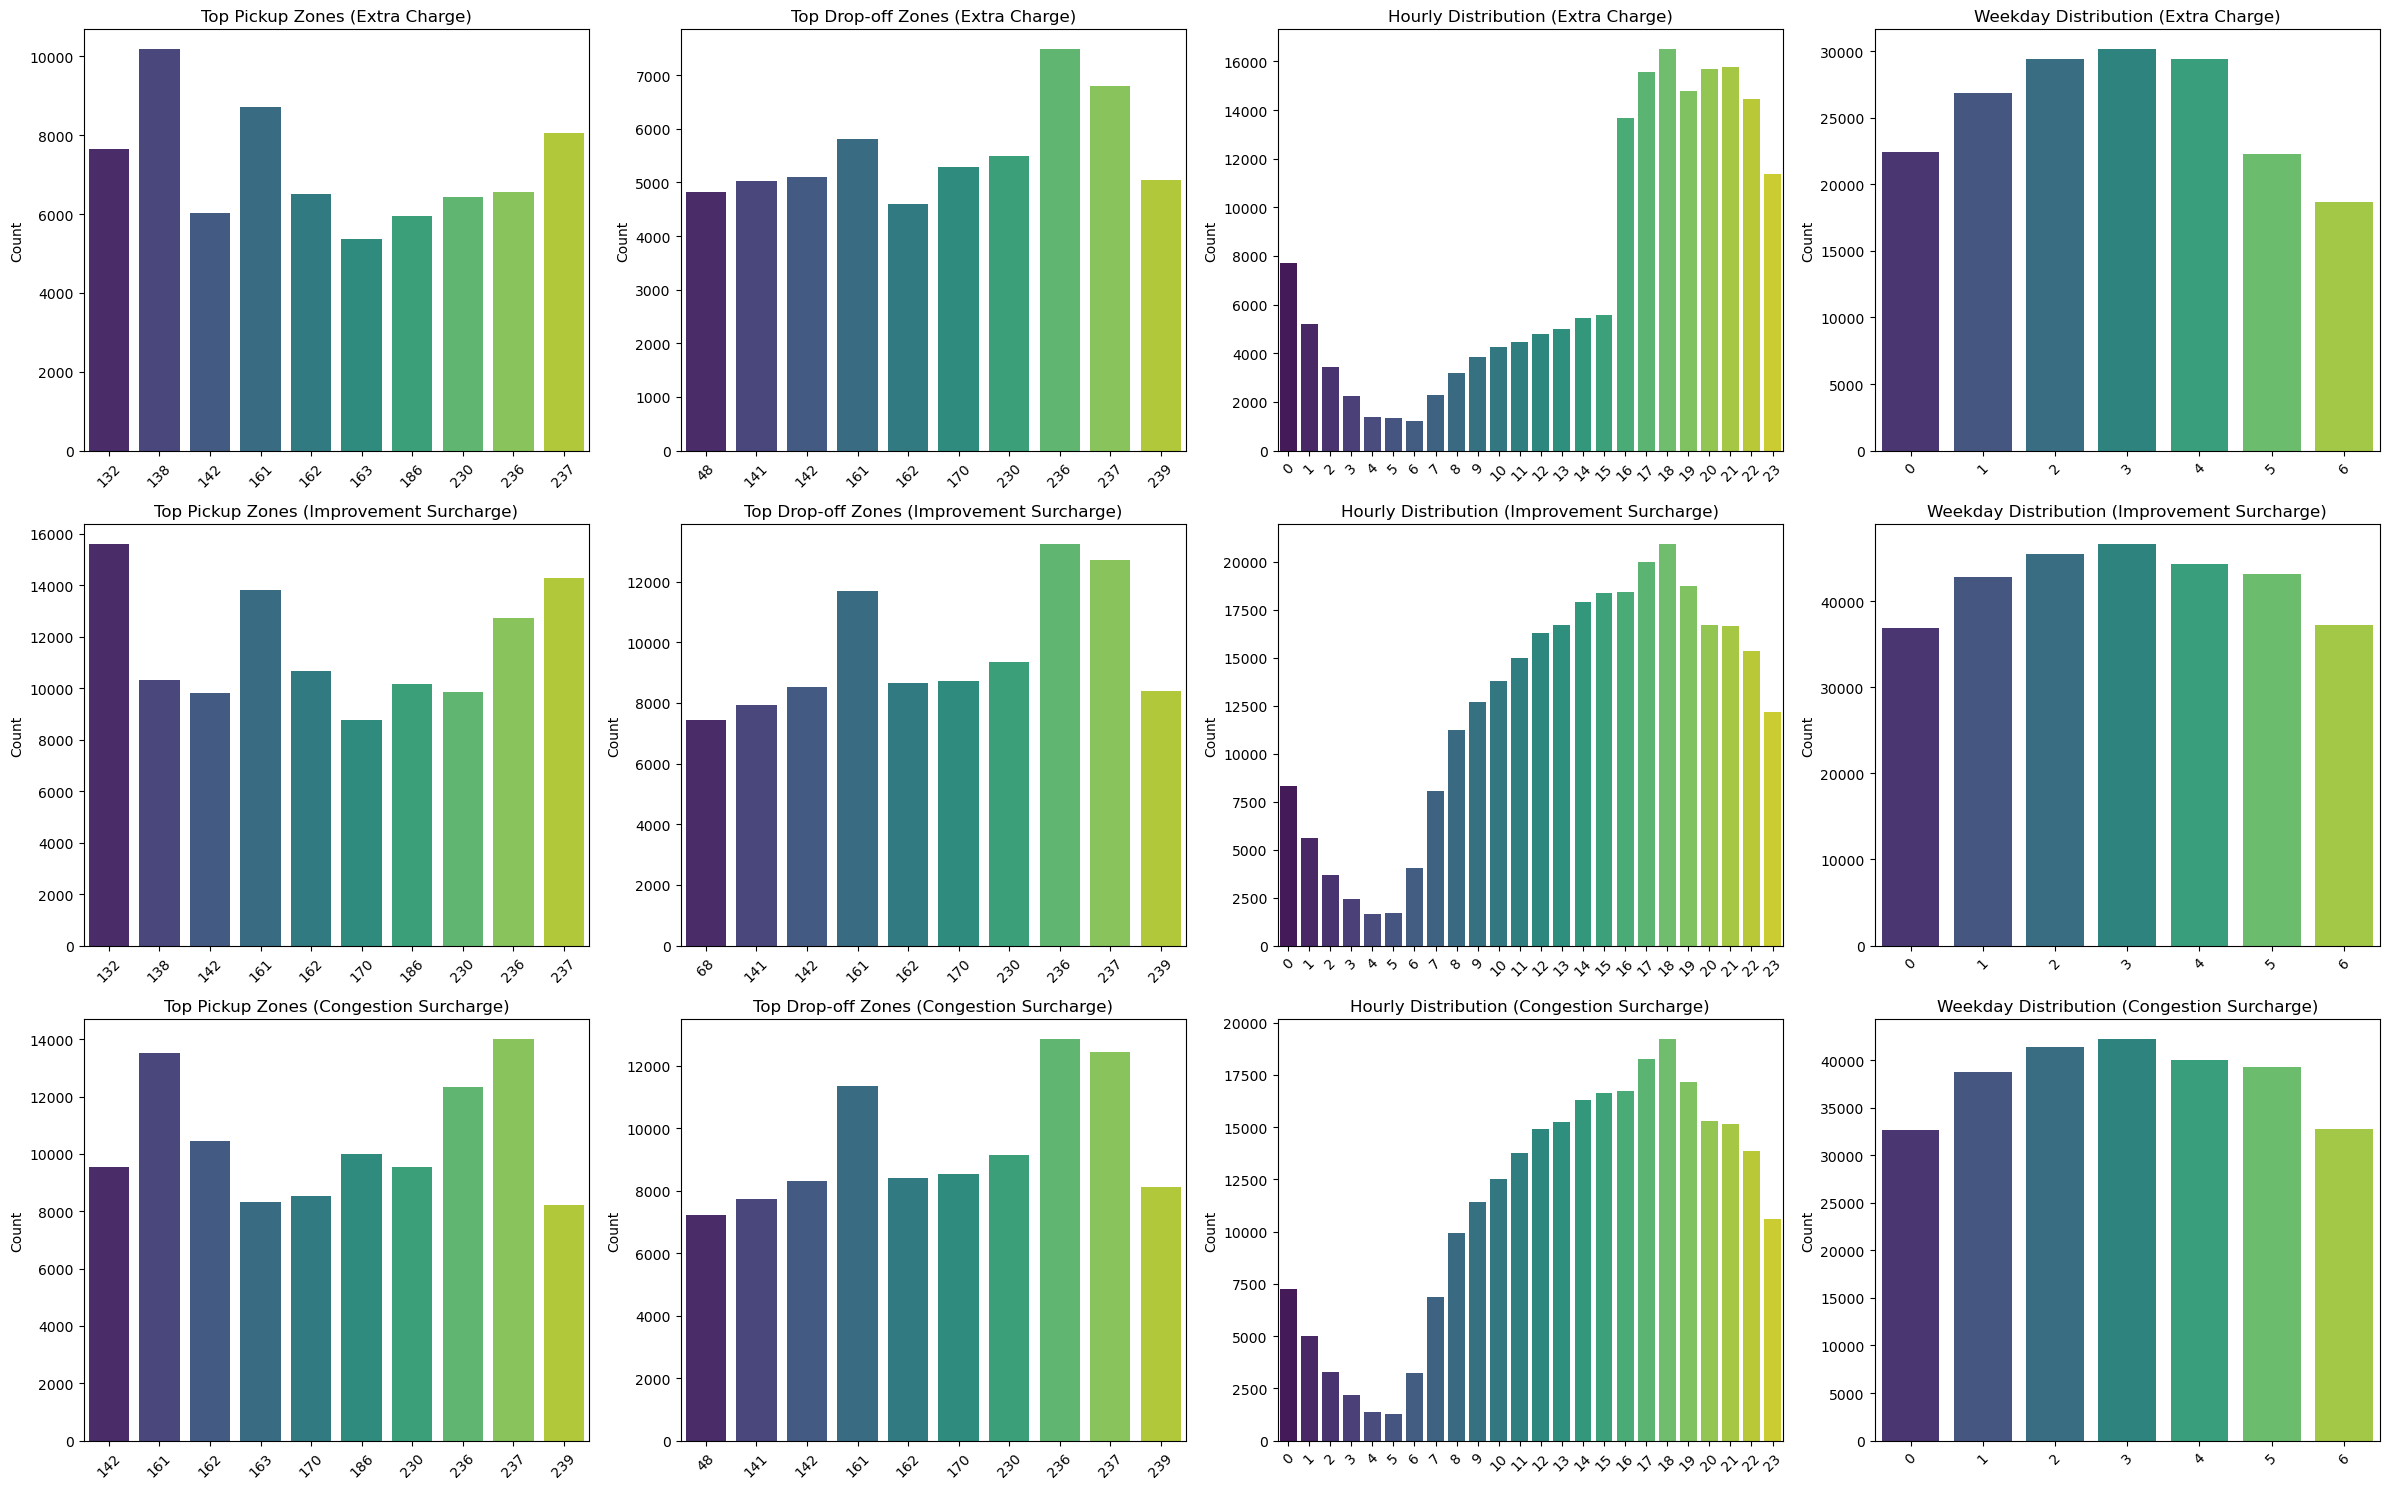

In [112]:
# How often is each surcharge applied?
extra_df = merged_df[merged_df["extra"] > 0]
improvement_surcharge_df = merged_df[merged_df["improvement_surcharge"] > 0]
congestion_surcharge_df = merged_df[merged_df["congestion_surcharge"] > 0]

pickup_extra = extra_df.groupby("PULocationID")["extra"].count().nlargest(10)
dropoff_extra = extra_df.groupby("DOLocationID")["extra"].count().nlargest(10)
hourly_extra = extra_df.groupby("hour")["extra"].count()
weekday_extra = extra_df.groupby("day_of_week")["extra"].count()


pickup_improvement = improvement_surcharge_df.groupby("PULocationID")["improvement_surcharge"].count().nlargest(10)
dropoff_improvement = improvement_surcharge_df.groupby("DOLocationID")["improvement_surcharge"].count().nlargest(10)
hourly_improvement = improvement_surcharge_df.groupby("hour")["improvement_surcharge"].count()
weekday_improvement = improvement_surcharge_df.groupby("day_of_week")["improvement_surcharge"].count()

pickup_congestion = congestion_surcharge_df.groupby("PULocationID")["congestion_surcharge"].count().nlargest(10)
dropoff_congestion = congestion_surcharge_df.groupby("DOLocationID")["congestion_surcharge"].count().nlargest(10)
hourly_congestion = congestion_surcharge_df.groupby("hour")["congestion_surcharge"].count()
weekday_congestion = congestion_surcharge_df.groupby("day_of_week")["congestion_surcharge"].count()

fig, axes = plt.subplots(3, 4, figsize=(24, 15))

# Titles for each subplot
titles = [       
    "Top Pickup Zones (Extra Charge)", "Top Drop-off Zones (Extra Charge)",
    "Hourly Distribution (Extra Charge)", "Weekday Distribution (Extra Charge)",

     "Top Pickup Zones (Improvement Surcharge)", "Top Drop-off Zones (Improvement Surcharge)",
    "Hourly Distribution (Improvement Surcharge)", "Weekday Distribution (Improvement Surcharge)",
    
    "Top Pickup Zones (Congestion Surcharge)", "Top Drop-off Zones (Congestion Surcharge)",
    "Hourly Distribution (Congestion Surcharge)", "Weekday Distribution (Congestion Surcharge)"
]

data_list = [
    pickup_extra, dropoff_extra, hourly_extra, weekday_extra,
    pickup_improvement, dropoff_improvement, hourly_improvement, weekday_improvement,
    pickup_congestion, dropoff_congestion, hourly_congestion, weekday_congestion,
]

for i, ax in enumerate(axes.flat):
    sns.barplot(x=data_list[i].index, y=data_list[i].values, ax=ax, palette="viridis")
    ax.set_title(titles[i])
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


# Extra charges are applied more on evening hours
# #132 has more congestion & improvement surcharge. Probably due to airport
# Weekday distribution is more of less the same
# Congestion & improvement surcharge gradully increases from morning hours to evening and tapers off by night


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1. We need to dispatch more cabs during high-demand hours. 2PM to 7PM seems to be of peak demand. 
2. Wednesday, Thursday and Friday has high demand compared to other days. We may need to focus on those days too
3. Highest pick up happened in Month of May & October. We also need to have more cabs available during those months in general

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1. 132 zone has highest pick up count due to proximity of airports. We need to position more cabs there
2. Manhattan in general has very high pick ups and drop offs. We need more cabs there too.
3. A lot of pick up and drop off zones are within manhattan. Probably due to business and residential zones. More cabs for manhattan in general

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. We need a demand based pricing strategey. For evening hours we can increase pricing.
2. For midnight to early mornings when demand is low we can reduce the pricing with discounts and promotions
3. For Friday evenings & Weekends we can have a better pricing
4. For January and February which are lean months we can have promotional offers
5. Vendor #1 need a better pricing as there is a huge gap in average fare for <2 miles distance